In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def data (x, m):
    
    df = []
    for i in x:
        z = []
        for j in range (m):
            z.append (i**j)
        df.append (z)
        
    df = pd.DataFrame (df)
    return df

In [3]:
def find_weights (X, Y):
    
    rhs = np.matmul (X.T, Y)
    lhs = np.matmul (X.T, X)
    
    return np.matmul (np.linalg.inv (lhs), rhs)

In [95]:
def linear_regression (x, y, m):
    
    df = data (x, m)
    w = find_weights (df.values, y)
    
    val = np.linspace (0, 2*np.pi, 2)
    
    plt.xlim(0, 2*np.pi)
    plt.ylim(1.5, -1.5);
    plt.plot(val, np.matmul (data (val, m).values, w), linestyle='solid', color=lighten_color('grey', 0.4))
    plt.scatter (x, y, color = "red")
    
    return w

In [91]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [74]:
x = np.linspace (0, 2*np.pi, 15)
y = np.sin (x)

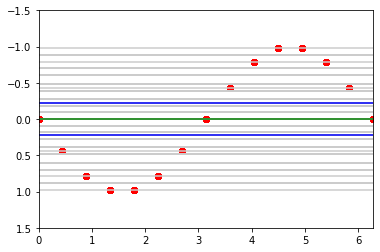

In [93]:
mw = []
ww = []

for i in range (len (x)):
    for j in range (i+1, len (x)):
        
        x_t = [x [i], x [j]]
        y_t = [y [i], y [j]]
        w = linear_regression (x_t, y_t, 1)
        ww.append (w)
        
v = 0
for val in ww:
    v = v + val
    
mw.append (v/len(ww))

val = np.linspace (0, 2*np.pi, 2)
    
plt.xlim(0, 2*np.pi)
plt.ylim(1.5, -1.5);
plt.plot(val, np.matmul (data (val, 1).values, mw), linestyle='solid', color = "green")

var = np.var (ww)

val = np.linspace (0, 2*np.pi, 2)
    
plt.xlim(0, 2*np.pi)
plt.ylim(1.5, -1.5);
plt.plot(val, np.matmul (data (val, 1).values, mw) + var, linestyle='solid', color = "blue")
plt.plot(val, np.matmul (data (val, 1).values, mw) - var, linestyle='solid', color = "blue")

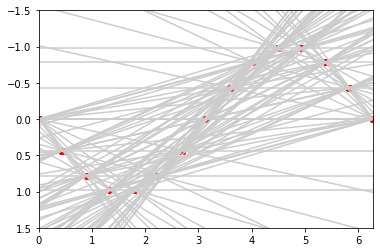

In [98]:
for i in range (len (x)):
    for j in range (i+1, len (x)):
        
        x_t = [x [i], x [j]]
        y_t = [y [i], y [j]]
        w = linear_regression (x_t, y_t, 2)
        
plt.scatter (x, y, color = "red")
plt.show ()